In [1]:
import numpy as np                                     
import matplotlib.pyplot as plt                      
import seaborn as sns                                
from iminuit import Minuit                      
import sys             
from sympy import *                           
from scipy import stats
from scipy.special import binom as binomcoef
from scipy.special import expit, gamma
from scipy.integrate import trapz, simpson
import scipy.interpolate as scint
import pandas as pd
import os
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import GradientBoostingClassifier as Gra_classifier
from sklearn.ensemble import AdaBoostClassifier as Ada_classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import itertools
from importlib import reload

plt.style.use("../KD_style.mplstyle")


In [2]:
def mc_ac_new(func, xmin, xmax, ymin, ymax, N_points, **kwargs):
    xran = np.random.uniform(xmin, xmax, N_points)
    yran = np.random.uniform(ymin, ymax, N_points)
    yfunc = func(xran, **kwargs)
    bool_mask = yran <= yfunc
    missing = N_points - np.sum(bool_mask)
    if missing > 0:
        xrest, yrest, bool_rest = mc_ac_new(func, xmin, xmax, ymin, ymax, missing, **kwargs)
    else:
        xrest = np.empty(0)
        yrest = np.empty(0)
        bool_rest = np.empty(0, dtype = bool)
    finalx = np.append(xran, xrest)
    finaly = np.append(yran, yrest)
    finalbool = np.append(bool_mask, bool_rest)
    return finalx, finaly, finalbool

def mc_ac_df(func, xmin, xmax, ymin, ymax, N_points, upside_down = False, **kwargs):
    x, y, mask = mc_ac_new(func, xmin, xmax, ymin, ymax, N_points, **kwargs)
    if upside_down:
        mask = np.invert(mask)
    df = pd.DataFrame({"x": x, "y": y, "accept": mask})
    tries = len(x)
    eff = np.sum(mask)/tries
    area = (xmax - xmin) * (ymax - ymin) * eff
    return df, {"area": area, "effeciency": eff, "tries": tries}

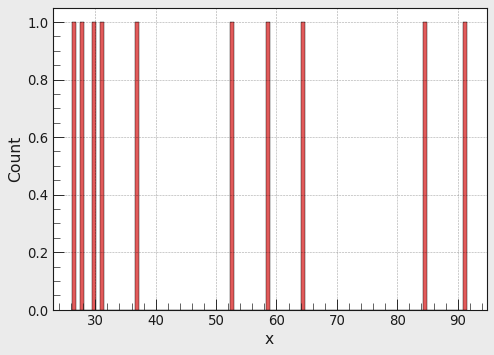

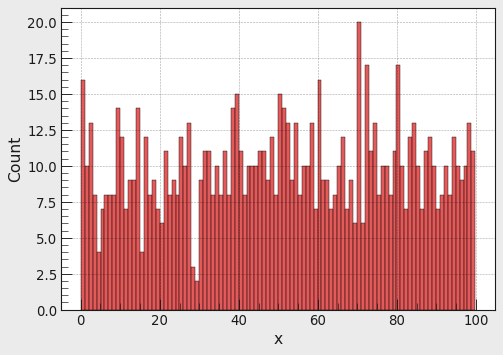

<AxesSubplot:xlabel='x', ylabel='Count'>

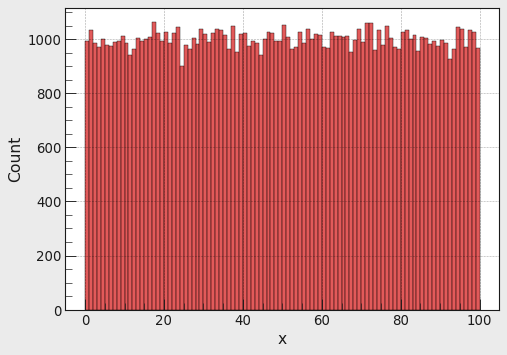

In [5]:
def function_test(x):
    return np.array([1 for i in x])
df_1, data_info_1 = mc_ac_df(function_test, 0, 100, 0, 1, 10)
df_2, data_info_2 = mc_ac_df(function_test, 0, 100, 0, 1, 1000)
df_3, data_info_3 = mc_ac_df(function_test, 0, 100, 0, 1, 100000)
sns.histplot(df_1["x"], bins = 100)
plt.show()
sns.histplot(df_2["x"], bins = 100)
plt.show()
sns.histplot(df_3["x"], bins = 100)


In [ ]:
def function_test_with_signal(x):
    return np.array([1 for i in x])